## Observations and Insights 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [117]:
# Checking the number of mice.
count_mice = list(merged_data["Mouse ID"].value_counts()) 
  
# print the unique value counts 
print("Number of mice:", len(count_mice))

Number of mice: 249


In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [119]:
# Optional: Get all the data for the duplicate mouse ID. 
# Select duplicate rows except first occurrence based on all columns
duplicate_entries = pd.DataFrame(merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])])
print(duplicate_entries)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [121]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
counting_mice = list(cleaned_data["Mouse ID"].value_counts()) 
  
# print the unique value counts 
print("Number of mice:", len(counting_mice))

Number of mice: 249


## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).mean().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
Median = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).median().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
Variance = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).var().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Variance Tumor Volume (mm3)"})
StDev = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).std().drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"Standard Deviation Tumor Volume (mm3)"})
SEM = pd.DataFrame(cleaned_data).groupby(["Drug Regimen"]).sem().drop(["Mouse ID", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis = 1).rename(columns={"Tumor Volume (mm3)":"SEM Tumor Volume (mm3)"})

# Assemble the resulting series into a single summary dataframe.
Summary = pd.merge(Mean,Median,how='outer',on="Drug Regimen")
Summary = pd.merge(Summary,Variance,how='outer',on="Drug Regimen")
Summary = pd.merge(Summary,StDev,how='outer',on="Drug Regimen")
Summary = pd.merge(Summary,SEM,how='outer',on="Drug Regimen")
Summary



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Already did this in the previous section
# Using the aggregation method, produce the same summary statistics in a single line

Summary_Agg = Summary.aggregate(['mean']).rename(index={'mean':'Aggregate Mean Across Regimens'})
Summary_Agg


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Aggregate Mean Across Regimens,50.982189,49.935849,47.795259,6.816315,0.500988


## Bar and Pie Charts

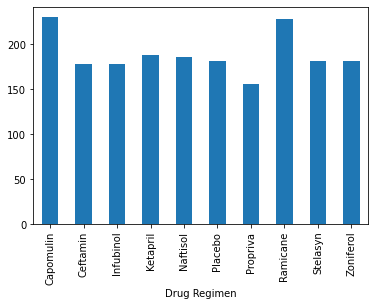

In [148]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Totals = pd.DataFrame(cleaned_data).groupby("Drug Regimen").count()
Totals.groupby("Drug Regimen")['Age_months'].sum().plot(kind='bar')


In [149]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#I can't figure out the difference between pandas and pyplot here

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Summary = pd.DataFrame(cleaned_data).groupby("Sex")
Gender_Summary['Sex'].describe().drop(['unique'],['top'],['freq']


,count,unique,top,freq
Sex,,,,
Female,930,1,Female,930
Male,958,1,Male,958


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
